In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("student_spending (1).csv")

In [3]:
# Drop unnecessary column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [5]:
# Splitting the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['tuition'])  # Features
y = df_encoded['tuition']  # Target variable

In [6]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predictions on the test set
y_pred = linear_model.predict(X_test)

In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 733929.7028329431
Coefficient of Determination (R^2): -0.027885320111534995


In [11]:
# Display various coefficients in tabular form
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print("\nCoefficients of the linear regression model:")
print(coefficients)


Coefficients of the linear regression model:
                                        Feature  Coefficient
0                                           age    13.190453
1                                monthly_income     0.011106
2                                 financial_aid     0.009358
3                                       housing    -0.176982
4                                          food    -0.173818
5                                transportation     0.728642
6                                books_supplies    -0.128475
7                                 entertainment    -0.942611
8                                 personal_care    -1.637121
9                                    technology    -0.059201
10                              health_wellness     0.359236
11                                miscellaneous    -0.447112
12                                  gender_Male    32.015894
13                            gender_Non-binary    61.689349
14                        year_in_schoo

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [13]:
print(df.describe())

               age  monthly_income  financial_aid      tuition     housing  \
count  1000.000000     1000.000000    1000.000000  1000.000000  1000.00000   
mean     21.675000     1020.650000     504.771000  4520.395000   696.00600   
std       2.322664      293.841161     287.092575   860.657944   171.21862   
min      18.000000      501.000000       0.000000  3003.000000   401.00000   
25%      20.000000      770.750000     261.000000  3779.750000   538.75000   
50%      22.000000     1021.000000     513.000000  4547.500000   704.50000   
75%      24.000000     1288.250000     751.500000  5285.000000   837.25000   
max      25.000000     1500.000000    1000.000000  6000.000000  1000.00000   

              food  transportation  books_supplies  entertainment  \
count  1000.000000      1000.00000     1000.000000    1000.000000   
mean    252.642000       124.63700      174.761000      84.814000   
std      86.949606        43.55799       72.404518      37.970451   
min     100.000000   

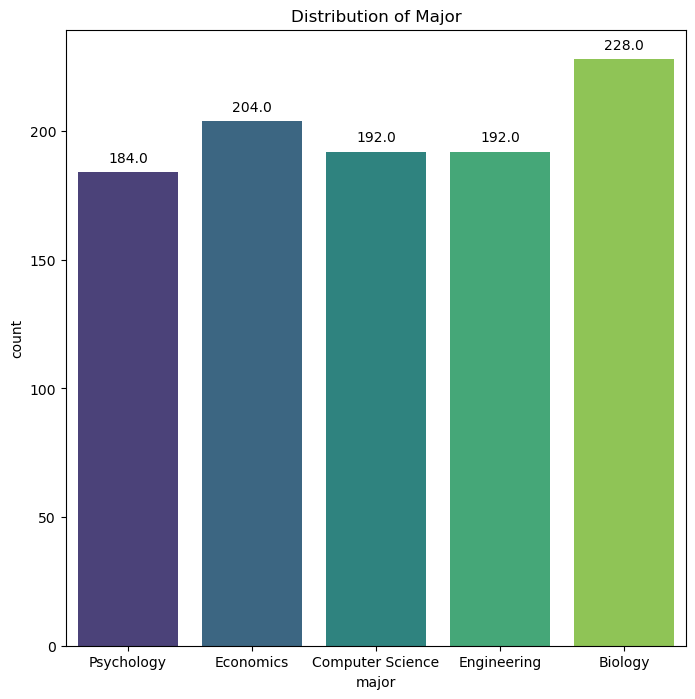

In [14]:
# Plot count distribution of 'major'
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='major', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Major')
plt.show()

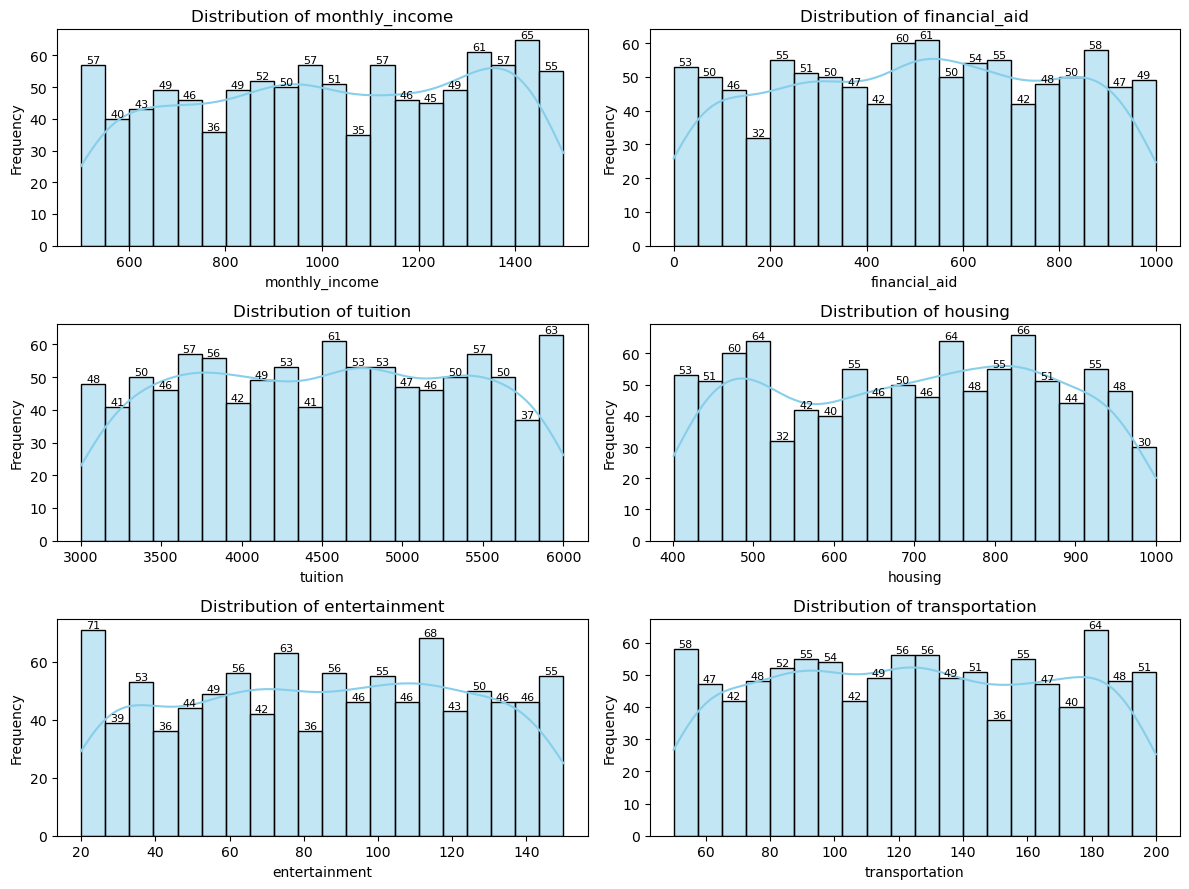

In [15]:
# Select columns for histograms
selected_columns = ['monthly_income', 'financial_aid', 'tuition', 'housing', 'entertainment', 'transportation']
# Plot histograms for selected columns
num_rows = len(selected_columns) // 2 + len(selected_columns) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='skyblue')
    for rect in axes[i].patches:
        height = rect.get_height()
        axes[i].text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
# Select relevant columns for correlation analysis
selected_columns = ['tuition', 'major', 'year_in_school', 'preferred_payment_method']
# Encode categorical columns
df_copy = df.copy()
label_encoder = LabelEncoder()
for column in selected_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])
    
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame for correlation analysis after encoding categorical columns
df_copy = df.copy()

# Initialize LabelEncoder from scikit-learn
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['gender', 'year_in_school', 'major', 'preferred_payment_method']

# Apply LabelEncoder to each categorical column in the copied dataset
for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Calculate correlation matrix
correlation_matrix = df_copy.corr()

# Display correlations with the target variable
print(correlation_matrix.iloc[:, -1].sort_values(ascending=False))    

preferred_payment_method    1.000000
housing                     0.040399
financial_aid               0.037379
miscellaneous               0.027421
major                       0.017775
monthly_income             -0.009190
technology                 -0.018255
tuition                    -0.020909
food                       -0.021536
age                        -0.022827
gender                     -0.030592
personal_care              -0.034246
year_in_school             -0.043819
health_wellness            -0.044043
transportation             -0.049212
books_supplies             -0.054213
entertainment              -0.064413
Name: preferred_payment_method, dtype: float64


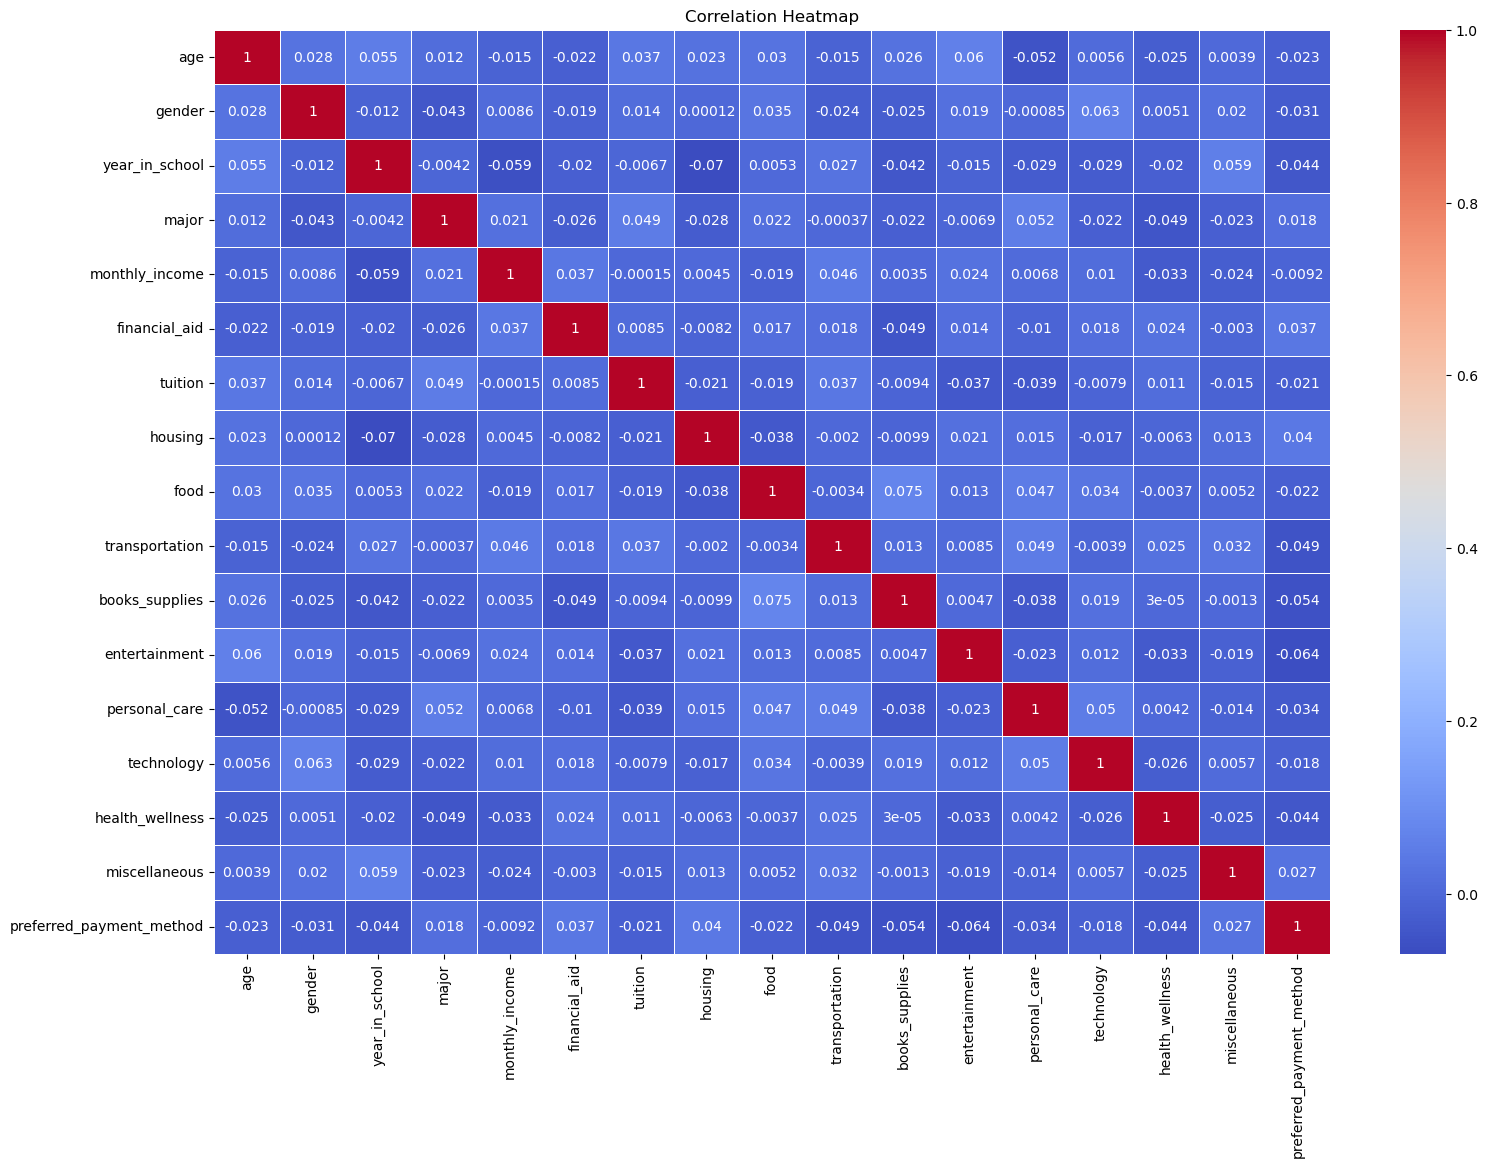

Mean Squared Error (MSE): 733929.7028329431
Coefficient of Determination (R^2): -0.027885320111534995

Coefficients of the linear regression model:
                                        Feature  Coefficient
0                                           age    13.190453
1                                monthly_income     0.011106
2                                 financial_aid     0.009358
3                                       housing    -0.176982
4                                          food    -0.173818
5                                transportation     0.728642
6                                books_supplies    -0.128475
7                                 entertainment    -0.942611
8                                 personal_care    -1.637121
9                                    technology    -0.059201
10                              health_wellness     0.359236
11                                miscellaneous    -0.447112
12                                  gender_Male    32.01589

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5 , annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Splitting the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['tuition'])  # Features
y = df_encoded['tuition']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
# Display various coefficients in tabular form
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print("\nCoefficients of the linear regression model:")
print(coefficients)

In [18]:
# Transform 'object' columns to 'category' for memory efficiency
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

# Define numeric columns for outlier detection
numeric_columns = ['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
                   'transportation', 'books_supplies', 'entertainment', 'personal_care',
                   'technology', 'health_wellness', 'miscellaneous']
# IQR method for outlier detection
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Display outliers
print("\nOutliers (IQR Method):")
print(outliers_iqr.sum())
print("\nNo outliers detected!")


Outliers (IQR Method):
age                0
monthly_income     0
financial_aid      0
tuition            0
housing            0
food               0
transportation     0
books_supplies     0
entertainment      0
personal_care      0
technology         0
health_wellness    0
miscellaneous      0
dtype: int64

No outliers detected!


In [19]:
# Transforming object columns into category type for memory efficiency
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

# Generate summary statistics
print(df.describe().T)

# Visualization
sns.set(style="whitegrid")

                  count      mean         std     min      25%     50%  \
age              1000.0    21.675    2.322664    18.0    20.00    22.0   
monthly_income   1000.0  1020.650  293.841161   501.0   770.75  1021.0   
financial_aid    1000.0   504.771  287.092575     0.0   261.00   513.0   
tuition          1000.0  4520.395  860.657944  3003.0  3779.75  4547.5   
housing          1000.0   696.006  171.218620   401.0   538.75   704.5   
food             1000.0   252.642   86.949606   100.0   175.00   255.0   
transportation   1000.0   124.637   43.557990    50.0    88.00   123.0   
books_supplies   1000.0   174.761   72.404518    50.0   112.00   175.0   
entertainment    1000.0    84.814   37.970451    20.0    54.00    86.0   
personal_care    1000.0    60.699   22.898007    20.0    41.00    62.0   
technology       1000.0   178.304   71.744441    50.0   114.00   178.0   
health_wellness  1000.0   114.310   49.591544    30.0    73.00   115.0   
miscellaneous    1000.0   108.910   52

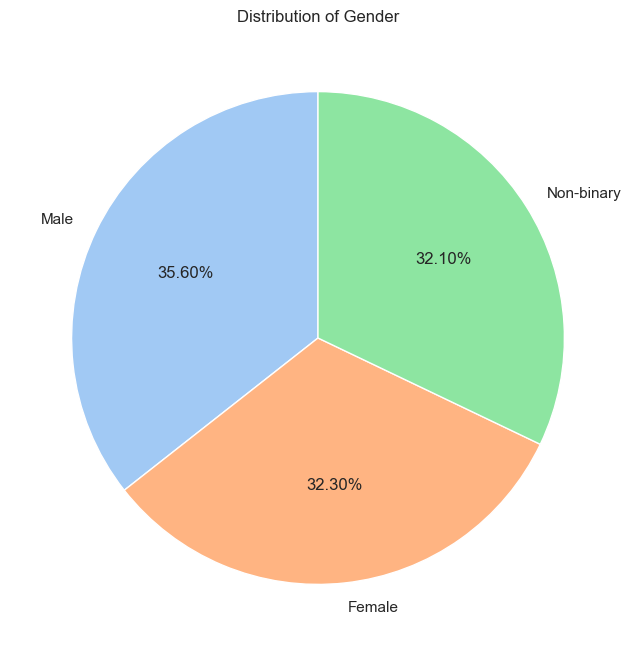

In [20]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Gender')
plt.show()

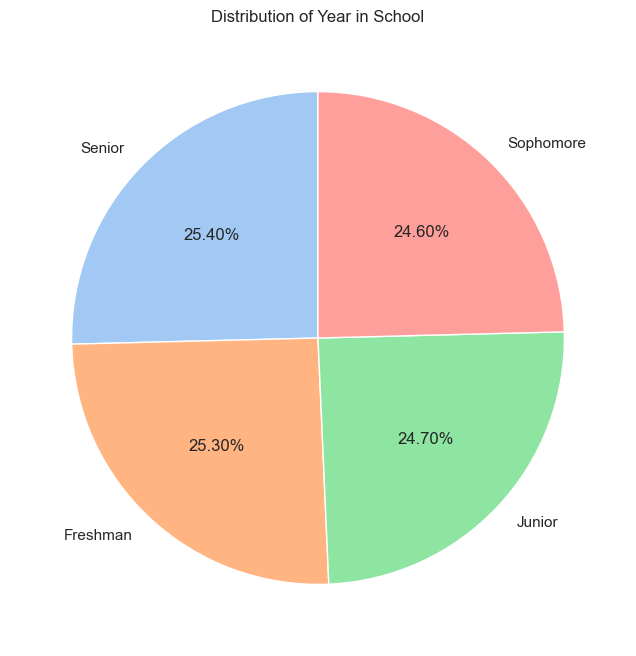

In [21]:
# Pie chart for year in school distribution
plt.figure(figsize=(8, 8))
plt.pie(df['year_in_school'].value_counts(), labels=df['year_in_school'].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Year in School')
plt.show()

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv("student_spending (1).csv")

# Drop unnecessary column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

# Assuming 'new_data' is a DataFrame containing new observations
# Create new_data with the same features as the original dataset
new_data = pd.DataFrame({
    'age': [20, 21, 22],  # Example values for age
    'gender': ['Male', 'Female', 'Non-binary'],  # Example values for gender
    'year_in_school': ['Junior', 'Senior', 'Freshman'],  # Example values for year_in_school
    'major': ['Computer Science', 'Economics', 'Psychology'],  # Example values for major
    'monthly_income': [1200, 1100, 1000],  # Example values for monthly_income
    'financial_aid': [500, 600, 700],  # Example values for financial_aid
    'housing': [700, 750, 800],  # Example values for housing
    'food': [300, 350, 400],  # Example values for food
    'transportation': [150, 160, 170],  # Example values for transportation
    'books_supplies': [200, 210, 220],  # Example values for books_supplies
    'entertainment': [100, 110, 120],  # Example values for entertainment
    'personal_care': [70, 80, 90],  # Example values for personal_care
    'technology': [250, 260, 270],  # Example values for technology
    'health_wellness': [150, 160, 170],  # Example values for health_wellness
    'miscellaneous': [100, 110, 120],  # Example values for miscellaneous
    'preferred_payment_method': ['Cash', 'Credit/Debit Card', 'Mobile Payment App']  # Example values for preferred_payment_method
})

# Display new_data
print("New data:")
print(new_data)

New data:
   age      gender year_in_school             major  monthly_income  \
0   20        Male         Junior  Computer Science            1200   
1   21      Female         Senior         Economics            1100   
2   22  Non-binary       Freshman        Psychology            1000   

   financial_aid  housing  food  transportation  books_supplies  \
0            500      700   300             150             200   
1            600      750   350             160             210   
2            700      800   400             170             220   

   entertainment  personal_care  technology  health_wellness  miscellaneous  \
0            100             70         250              150            100   
1            110             80         260              160            110   
2            120             90         270              170            120   

  preferred_payment_method  
0                     Cash  
1        Credit/Debit Card  
2       Mobile Payment App  


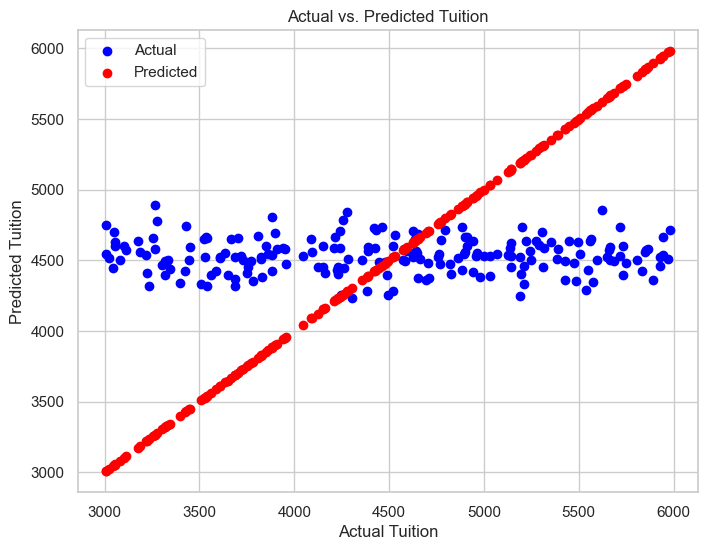

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' contains the actual values and 'y_pred' contains the predicted values
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual')  # Actual values in blue
plt.scatter(y_test, y_test, color='red', label='Predicted')  # Predicted values in red
plt.xlabel("Actual Tuition")
plt.ylabel("Predicted Tuition")
plt.title("Actual vs. Predicted Tuition")
plt.legend()
plt.show()